<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/milmor/NLP/blob/main/Notebooks/01_Tf-idf.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

# Tf-idf

In [1]:
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# datos
X = ["Lobos Gatos Elefantes",
     "Lobos Lobos Caballos Teatro",
     "Lobos Elefantes Lobos",
     "Computadora Procesador Lobos",
     "Teatro Pintura Elefantes",
     "Teatro Música Caballos Teatro Teatro"]
y = [0, 0, 0, 1, 2, 2]

vectorizer = TfidfVectorizer(norm=None)
X_vect = vectorizer.fit_transform(X)

In [4]:
X_vect

<6x9 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [5]:
X_vect.toarray()

array([[0.        , 0.        , 1.55961579, 2.25276297, 1.33647224,
        0.        , 0.        , 0.        , 0.        ],
       [1.84729786, 0.        , 0.        , 0.        , 2.67294447,
        0.        , 0.        , 0.        , 1.55961579],
       [0.        , 0.        , 1.55961579, 0.        , 2.67294447,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.25276297, 0.        , 0.        , 1.33647224,
        0.        , 0.        , 2.25276297, 0.        ],
       [0.        , 0.        , 1.55961579, 0.        , 0.        ,
        0.        , 2.25276297, 0.        , 1.55961579],
       [1.84729786, 0.        , 0.        , 0.        , 0.        ,
        2.25276297, 0.        , 0.        , 4.67884736]])

In [6]:
vectorizer.vocabulary_

{'lobos': 4,
 'gatos': 3,
 'elefantes': 2,
 'caballos': 0,
 'teatro': 8,
 'computadora': 1,
 'procesador': 7,
 'pintura': 6,
 'música': 5}

In [7]:
vectorizer.idf_

array([1.84729786, 2.25276297, 1.55961579, 2.25276297, 1.33647224,
       2.25276297, 2.25276297, 2.25276297, 1.55961579])

- Aquí tf denota la frecuencia del término y tf-idf es la frecuencia del término por la frecuencia inversa de documento. La frecuencia del termino es el número de veces que el término ocurre en el documento.

$$ \text{tf-idf}(t, d) = \text{tf}(t,d) \times \text{idf}(t)$$
$$ \text{idf}(t) = \log\frac{1 + n}{1 + \text{df}(t)} + 1$$
donde $n$ es el número total de documentos y $\text{df}(t)$ es el número total de documentos que contienen el término $t$.

Para la palabra "Lobos" con el índice de vocabulario es 4:

$$ \text{idf(lobos)} = \log\frac{1 + 6}{1 + 4} + 1 = 1.33$$

In [8]:
np.log(7/4) + 1

1.5596157879354227

In [9]:
np.log(7/5) + 1, vectorizer.idf_[4]

(1.336472236621213, 1.336472236621213)

- En el primer documento, la palabra "lobos" aparece una vez, por lo que tf(lobos, 0) = 1 y tf-idf(lobos, 0) = $1 \times 1.33 = 1.33$

- En el segundo documento, la palabra "lobos" aparece dos veces, por lo que tf(lobos, 1) = 2 y tf-idf(lobos, 1) = $2 \times 1.33 = 2.67$

In [10]:
X_vect.toarray()[:, 4]

array([1.33647224, 2.67294447, 2.67294447, 1.33647224, 0.        ,
       0.        ])

- Normalizando

In [11]:
from numpy import linalg as LA

In [12]:
l2_norm = LA.norm([0., 0., 1.55961579, 2.25276297, 1.33647224, 0., 0., 0., 0.])
l2_norm

3.0485243085321074

In [13]:
X_vect.toarray()[0] / l2_norm

array([0.        , 0.        , 0.51159697, 0.73896835, 0.43839973,
       0.        , 0.        , 0.        , 0.        ])

- Normalizando con TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(norm='l2')
X_vect = vectorizer.fit_transform(X)
X_vect.toarray()

array([[0.        , 0.        , 0.51159697, 0.73896835, 0.43839973,
        0.        , 0.        , 0.        , 0.        ],
       [0.51255443, 0.        , 0.        , 0.        , 0.74163976,
        0.        , 0.        , 0.        , 0.43273367],
       [0.        , 0.        , 0.50396702, 0.        , 0.8637229 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.65205671, 0.        , 0.        , 0.3868386 ,
        0.        , 0.        , 0.65205671, 0.        ],
       [0.        , 0.        , 0.49468646, 0.        , 0.        ,
        0.        , 0.71454223, 0.        , 0.49468646],
       [0.33515812, 0.        , 0.        , 0.        , 0.        ,
        0.40872228, 0.        , 0.        , 0.84889053]])

- Para utilizar TfidfVectorizer con datos de prueba utilizar únicamente el método __transform__

In [15]:
X = ["Lobos Computadora Elefantes"]

X_vect = vectorizer.transform(X)
X_vect.toarray()

array([[0.        , 0.73896835, 0.51159697, 0.        , 0.43839973,
        0.        , 0.        , 0.        , 0.        ]])

# Document vectors

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


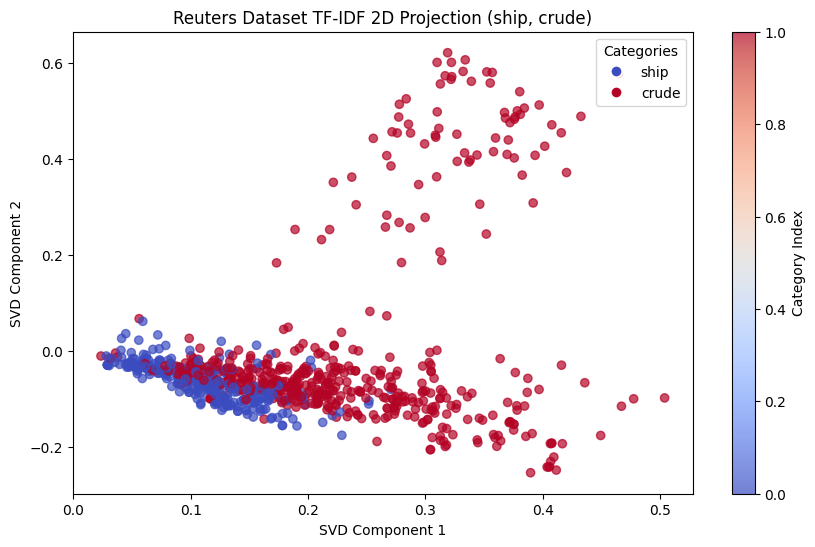

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter

# Download Reuters dataset
nltk.download('reuters')
nltk.download('punkt')

# Select two categories to include
selected_categories = {"crude", "ship"}  # Change these to any two categories

# Load documents and filter only selected categories
documents = [doc for doc in reuters.fileids() if set(reuters.categories(doc)) & selected_categories]
texts = [" ".join(reuters.words(doc)) for doc in documents]
categories = [next(iter(set(reuters.categories(doc)) & selected_categories)) for doc in documents]  # Get first matching category

# Convert text to TF-IDF representation
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# Reduce to 2D using Truncated SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_tfidf)

# Assign numerical labels to the two categories
category_to_idx = {cat: idx for idx, cat in enumerate(selected_categories)}
labels = np.array([category_to_idx[cat] for cat in categories])

# Plot results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='coolwarm', alpha=0.7)

# Create legend
legend_labels = {category_to_idx[cat]: cat for cat in selected_categories}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=8)
           for idx in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), title="Categories", loc='upper right')

plt.colorbar(label="Category Index")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title(f"Reuters Dataset TF-IDF 2D Projection ({', '.join(selected_categories)})")
plt.show()


In [17]:
texts[0], categories[0]

("JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWNWARDS The Ministry of International Trade and Industry ( MITI ) will revise its long - term energy supply / demand outlook by August to meet a forecast downtrend in Japanese energy demand , ministry officials said . MITI is expected to lower the projection for primary energy supplies in the year 2000 to 550 mln kilolitres ( kl ) from 600 mln , they said . The decision follows the emergence of structural changes in Japanese industry following the rise in the value of the yen and a decline in domestic electric power demand . MITI is planning to work out a revised energy supply / demand outlook through deliberations of committee meetings of the Agency of Natural Resources and Energy , the officials said . They said MITI will also review the breakdown of energy supply sources , including oil , nuclear , coal and natural gas . Nuclear energy provided the bulk of Japan ' s electric power in the fiscal year ended March 31 , supplying an estimate

In [18]:
texts[-1], categories[-1]

('WALL STREET STOCKS / U . S . OIL COMPANIES British Petroleum Co PLC \' s announcement that its U . S . subsidiary intends to tender for the 45 pct of Standard Oil Co & lt ; SRD > it does not already own , catapulted U . S . oil stocks sharply higher this morning , traders and analysts said . " It raises the specter of additional consolidation in the industry and that is what is boosting the other oils ," analyst Rosario Ilacqua of L . F . Rothschild said . Sanford Margoshes of Shearson Lehman Brothers said " this deal shows that British Petroleum , a conservative investor that knows the oil business , is clearly confident in the U . S . oil industry , and that shines well on the U . S . companies ." Philips Petroleum & lt ; P > gained 3 / 4 to 15 - 7 / 8 , Occidental Petroleum & lt ; OXY > one to 34 - 5 / 8 , USX Corp & lt ; X >, with its Marathon Oil Co unit , rose 1 / 2 to 28 - 3 / 8 . Exxon & lt ; XON > climbed one to 88 - 3 / 8 , Mobil & lt ; MOB > one to 50 - 1 / 4 , Atlantic Ri

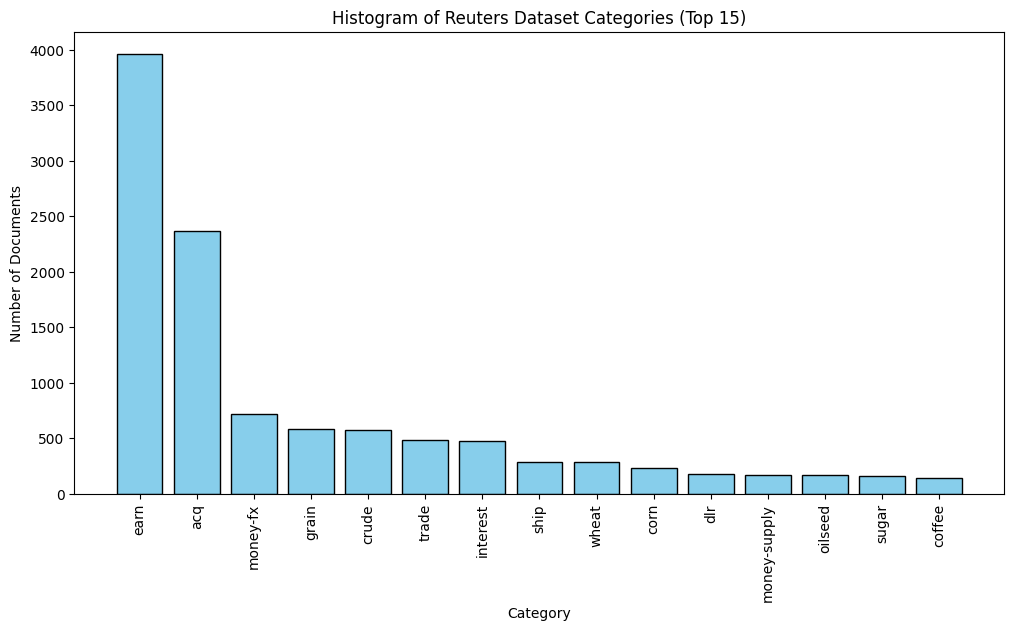

In [19]:
# Variable to control how many categories to show
num_categories_to_show = 15  # Change this to 15, 20, etc.

# Count occurrences of each category
category_counts = Counter(cat for doc in reuters.fileids() for cat in reuters.categories(doc))

# Sort categories by frequency
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Select only the top `num_categories_to_show`
categories, frequencies = zip(*sorted_categories[:num_categories_to_show])

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(categories, frequencies, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Documents")
plt.title(f"Histogram of Reuters Dataset Categories (Top {num_categories_to_show})")
plt.show()
